# Importing libraries

In [1]:
import os
import json
from csv import DictReader, DictWriter
import re
import math
import numpy as np
from numpy import array
from sklearn.model_selection import train_test_split
from nltk.stem.porter import *
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as  pd 
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator
import nltk
import time
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.probability import FreqDist
from sklearn.feature_extraction import text 
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ATE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ATE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Importing Hotel Review Data 

In [2]:
#Reading excel data
data = pd.read_excel(r"C:\Users\ATE\Desktop\Project\clootrack\testdata.xlsx")

In [3]:
data

,Review,date,Location,Unnamed: 3
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,NaN
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,NaN
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,NaN
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,NaN
...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,NaN
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,NaN
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,NaN
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,NaN


# Cleaning the Dataset

## Removing unnecessary columns from dataset

In [4]:
data.drop(['Unnamed: 3'], axis='columns', inplace=True)

In [5]:
data.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [6]:
#Dataset shape
data.shape

(6448, 3)

In [7]:
#Dataset basic analysis
data.describe()

<ipython-input-7-6cd4b60a96b3>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,Review,date,Location
count,6393,6448,1711
unique,6384,385,1082
top,Amazing\n \n Read more\n Read less,2019-06-01 00:00:00,United States of America
freq,4,150,116
first,NaN,2018-08-01 00:00:00,NaN
last,NaN,2019-08-20 00:00:00,NaN


In [8]:
data

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
6444,·the internet barely worked or didn't work,2019-07-12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America


## Removing the rows which have no reviews

In [9]:
data.dropna(subset=['Review'], inplace=True)
data.shape

(6393, 3)

In [10]:
data.columns

Index(['Review', 'date', 'Location'], dtype='object')

In [11]:
data['Review']

0       I was very impressed with the resort.\n Great ...
1       The rooms were nice the outside needs work als...
2       Great location! I have stayed at this hotel on...
3       The hotel was adequate for my stay. The strips...
4       Great location, room was large and spacious. P...
                              ...                        
6443    ·the staff were all so friendly. frank, the ch...
6444           ·the internet barely worked or didn't work
6445    ·the location was great.\n \n \n \n \n ·the be...
6446    ·we were early for check in and the staff was ...
6447    ·staff, free coffee, location and activities.\...
Name: Review, Length: 6393, dtype: object

In [12]:
#Manually dealing with unwanted Reviews
data['Review'].loc[507]

'👍👍👍👍👍👍🌹👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍🌹👍👍👍👍👍👍👍👍👍👍👍👍🌹👍👍👍\n  \n  Read more\n  Read less'

In [13]:
data.drop(507, inplace=True)
data.head(5)

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


## Removing Special characters from each review

In [14]:
data['Review'].loc[1]

'The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok\n  \n  Read more\n  Read less'

In [15]:
spec_chars = ["!",'"',"#","%","&","'","(",")","·"
              "*","+",",","-",".","/",":",";","<","👍"
              "=",">","?","@","[","\\","]","^","_",'\n',
              "`","{","|","}","~","–","\n","  ","Read more","Read less"]

for char in spec_chars:
    data['Review'] = data['Review'].str.replace(char, '')

<ipython-input-15-af73e963a6a6>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Review'] = data['Review'].str.replace(char, '')
<ipython-input-15-af73e963a6a6>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Review'] = data['Review'].str.replace(char, '')


In [16]:
data['Review']

0       I was very impressed with the resort Great sta...
1       The rooms were nice the outside needs work als...
2       Great location I have stayed at this hotel on ...
3       The hotel was adequate for my stay The strips ...
4       Great location room was large and spacious Par...
                              ...                        
6443    the staff were all so friendly frank the chef ...
6444             the internet barely worked or didnt work
6445    the location was great the bed was the most un...
6446    we were early for check in and the staff was v...
6447    staff free coffee location and activities the ...
Name: Review, Length: 6392, dtype: object

In [17]:
data['Review'].loc[1]

'The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok'

## Resetting index

In [18]:
data.dropna(subset=['Review'], inplace=True)
data.shape

(6392, 3)

In [19]:
data = data.reset_index(drop=True)
data

,Review,date,Location
0,I was very impressed with the resort Great sta...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location I have stayed at this hotel on ...,2019-08-20,Georgia
3,The hotel was adequate for my stay The strips ...,2019-08-20,NaN
4,Great location room was large and spacious Par...,2019-08-19,Palm Harbor
...,...,...,...
6387,the staff were all so friendly frank the chef ...,2019-07-12,United States of America
6388,the internet barely worked or didnt work,2019-07-12,United States of America
6389,the location was great the bed was the most un...,2019-07-10,United States of America
6390,we were early for check in and the staff was v...,2019-07-10,United States of America


# Translation

## Translating the reviews from different languages into English 

In [20]:
from textblob import TextBlob
list_r = data["Review"]
list_review = []
index = 0
for i in list_r:
    primary_text = str(i)
    blob = TextBlob(i)
    if len(i) < 3 :
        list_review.append(primary_text)
    elif blob.detect_language() == 'en':
        list_review.append(primary_text)
    else:
        a = blob.translate(to='en')
        a = str(a)
        print(a)
        list_review.append(a)
    time.sleep(1)
    print(index)
    index = index + 1
data["Translated"] = list_review
data['Translated'].head(10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
The service is super friendly, not everyone at the buffet, everyone supur friendly, I think they make a difference, they make your bad moment in the lobby forget
14
15
16
17
18
19
20
21
22
There was basically no problem. It is clean and soundproof, and the water area is clean and there is no problem with the water pressure in the shower. However, there are no toothbrushes, slippers, bathrobes, etc. There was shampoo, soap, trouser press, refrigerator and so on.
23
24
25
26
27
28
In general excellent Fantastic situation Two important drawbacks for me 25 dollars for storing my suitcases 3 hours at the exit There was no refrigerator or water heater in the room I requested them and they offered me to put them with charge
29
30
The family rooms are practical there were 7 of us and it is nice to be all together However the staff is execrable The person at the reception allowed himself to tell my husband that he was too slow when checking in is unacceptable In 

461
462
The room was small but it was good a minibar could be good if you want to have a drink at any time
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
I am satisfied with everything, except that I am extremely dissatisfied with the service attitude of a female employee who is racially discriminatory. There is also a problem with their mode of operation. I originally checked in for 3 days, and I paid for the 3 days with a credit card online. Then I went to their front desk the next day after I checked in and they said that I wanted to stay one more day, and they said it was okay to pay for that day, so I paid them in cash on the spot, but when I When checking out, the staff at the front desk told me that he did not see the last day's money I paid in the computer system. I told them that I paid the money. Y

824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
Comfortable and very quiet room One downside was the cleaning staff trying to get into the room while I was still there.
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
Excellent location Very small room and very old bliss
862
863
864
Comfortable clean good location reasonable price for the location
865
866
867
868
869
870
871
872
Excellent
873
874
875
876
The location of the hotel is fantastic preserves the decor and atmosphere of the 30s They should update the bathrooms and include a refrigerator in the rooms
877
878
879
880
The location is the strong point It's close to everything Metro Macys Madison SQuare Garden We were disappointed with the room We got a double bed when the reception had told us a king bed But the worst is the heat in the room The air conditioning was defective It was 256 degrees No other rooms available
881
882
883
884
885
Very good stay hotel well located met

1114
1115
1116
1117
excellent service I love that from arrival they are super friendly the food is very rich and good price excellent distance from the park can be reached walking very clean I would stay here again
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
The hot water in the room was very muddy. I told the front desk about it at checkout, but there was no apology. The sound of the plumbing in the next room was so loud that it was awakened many times in the middle of the night. In the first place, the bathroom in the next room is in the shape of a room that cuts into it. Towels were not replenished sufficiently. It may be an option, but it's a pity that there is no refrigerator.
1128
1129
1130
1131
1132
1133
Everything was perfect
1134
1135
Brown water comes out of the faucet. It will return to transparent in about 5 minutes with the water running out. The water pressure and hot water temperature were the best for Japanese people. The sound of water in the next room sounds lik

1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
The style of the hotel is unique the welcome is perfect and a great bed Thank you
1542
1543
1544
1545
1546
1547
1548
An incredible experience
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
Art Nouveau hotel full of charm but not very modern Very well placed because between 34th and 35th street Everything within reach stores restaurants bus and metro A tip do not have breakfast on site Go to Andrwes cafe at the corner of 7th ave and 35th street Two minutes walk to be in a real American diner Attention no kettle in the room
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
great place great attendants
1580
1581
1582
1583
1584
1585
Super friendly staff, great room, although very small, but you are only there to sleep and it is sufficient for that
1586
1587
1588
1589
1590
1591
1592
1593
Friendly service from hotel staff
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605

1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
Unbeatable treatment Nice and helpful staff Rooms a bit old but clean
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
Excellent hotel comfort WiFi and bad shower
1984
1985
The location is great, everything can be reached quickly from here. The hotel is good and the staff are very accommodating
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
The lobby is beautiful Otherwise I didn't like it much
2019
2020
2021
2022
2023
2024
2025
It is very convenient to use Newark Airport because it is close to the pen station. As the name suggests, it is close to Times Square and has easy access to all spots. You can enjoy your stay because there is everything around you. The only difficulty is that I can he

2193
It is a convenient location, close to the airport and close to the shopping mall. The front desk of the hotel was very nice, the rooms were clean and the beds were spacious and comfortable. However, the only inconvenience was that there was no refrigerator in the room.
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
Very nice spacious room modern comfy beds welcoming staff and close to times square highly recommend
2225
2226
2227
2228
2229
2230
2231
2232
2233
Great base and close to metro good service
2234
Art deco hotelCarpet in the roomsGood location
2235
Convenient New York Location Suites are spacious and comfortable
2236
2237
2238
The hotel is correct My room was not modern in style But the hotel is officialized Disneyworld So it is possible to benefit from the extra magical hours It is well located next to Disney Springs 5 ​​minutes walk The shuttle system to go to the 

2612
2613
2614
2615
2616
2617
Hotel is in need of renovation especially the bathroom and curtains
2618
2619
We loved the location steps from Disney Springs
2620
2621
2622
2623
2624
2625
2626
2627
2628
Super location in the middle of Manhattan with subway and madison square garden as a neighbor Remember to book with a view
2629
2630
2631
2632
2633
2634
2635
It is not what you see in the photos and besides pay more than what it said on Expedia
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
Acceptable hotel for the price you pay there are several restaurants within 100 meters to eat small room big TV screen the taxi charges approx $ 30 from La Guardia they have taxi service at any time of the morning you just have to ask for it the night before and arrive on time very basic breakfast included
2658
2659
2660
2661
2662
2663
2664
2665
2666
I loved the kindness of the excited people, they have a solution to everything If you check

2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
Small central rooms like in all quiet Manhattan
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
The hotel met the expectations Staff were friendly and helpful and helped us hail a taxi to the airport The only problem is that it is quite far from Manhattan
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
Very good experience I recommend it
2997
2998
Good great location Tremendous cleanliness and excellent service
2999
3000
3001
3002
3003
3004
Excellent location and central with several stores around to do shopping The best is three blocks from the Empire State Building
3005
3006
3007
Amazing
3008
I liked the hotel very good location if you go on a tourist plan the room very clean although it was narrow As for the restaurant service I found it very bad inatte

3195
3196
3197
My family and I had a good stay The hotel offers fair service in view of the price that counts.
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
Exemplary food Spacious room but not clean and the beds of average quality Location 20 minutes from Time square with parking in front
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
Hotel very well located but very old modest comfort
3242
Excellent location, very friendly people, comfortable rooms
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
Superb
3264
3265
3266
3267
3268
3269
3270
Small room They say there's a coffee maker in the room and it doesn't even fit in. There are better hotel options nearby
3271
3272
3273
welcoming hotel steeped in history very well located Vintage and exotic We adored The only downside the very dated bathrooms
3274
3275


Great starting point for the parks in Orlando, only 15 minutes away by shuttle bus
3595
3596
3597
3598
3599
3600
3601
3602
3603
Pretty vintage hotel from 1930 in close proximity to the subway and many sights
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
very good all the only thing that parking is expensive
3648
3649
It is a hotel that seems to be in the center Yamamoto
3650
Good hotel very nice staff they do everything they can to let you have a nice stay Good place rooms neat but unfortunately very noisy For the rest highly recommended
3651
3652
3653
Very good attention
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
Nothing in particular about my experiences.
3669
The Hotel is very well located and the lobby is very nice Courteous and fast service The rooms are small poorly insulated a

3945
3946
3947
3948
Super close to Disney Excellent staff and clean rooms
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
4-STAR HOTEL THAT IN ITALY WOULD BE QUALIFIED WITH ONLY 2 STARS OLD AS STYLE WITH ROOMS SO SMALL THAT TWO PEOPLE WITH TWO LARGE SUITCASES COULD NOT MOVE FURNISHING THE ROOM VERY OLD WITH TELEVISION WITH REMOTE CONTROL DEFECTIVE OF RIFFECIOUS PERFECTS BECAUSE THE GLASSES OF THE WINDOWS WERE VERY THIN THE CARPETING OF THE FLOOR AND THE ROOM OF A BROWN FANTASY AS WELL AS THE PAINTED WALLS OF A CREAM COLOR IN ITALY MAYBE YOU WERE SEEN IN THE SIXTIES THE LIGHT IN THE ROOMS THEN WAS REALLY COLD
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
It was good that the staff was Frank. It is a historic building with a nice atmosphere and is easily accessible as it is close to Penn station.
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
Nice hotel near Madison Square garden Was so lucky that I had a room high up with a view The room was nice and clean a

4272
4273
Hotel with great location with subway stations next door and one block away very helpful staff For those who go to NY for a walk or shopping, the room is a good size, the only absence felt was a minibar
4274
4275
Had booked a family room for 5 adults 2 Queen beds and 2 single beds Got a room with a King size bed and a bunk bed Which was completely incomprehensible as we did not get a bed seat all When we complained they said that in their computer it said that we should have the room we were assigned after many trips, we had to change to a family room the next day, however, with a bunk bed instead of single beds
4276
4277
4278
4279
4280
4281
4282
The hotel does not live up to the described standard Closer to a category 3 out of 5 The hotel is worn and the staff could well be more friendly informative etc. The location is super The breakfast is not worth the money
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
The hotel is centrally located in Manhattan, the part of New Yor

Nice hotel with the perfect location for shopping and food The staff was nice and always present The cleaning was excellent I would happily choose this hotel again
4510
The hotel has a great location right in the middle of Manhattan with Madison Square Garden to one side and Penn Station as well Beds are comfortable but rooms small The hotel is run down with stained hallway walls and old carpets I can understand you wanting to keep your vintage style but needs renovation The windows in the rooms are old so even though our room was on the 21st floor we could hear all the noise from the street However I think I got just what I paid for and the location is really what best
4511
4512
4513
4514
good in general
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
Good location but no breakfast They charge you to leave your bags on arrival and when you leave
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
It was quiet and comfortable, and 

4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
Great location hotel From the airport by train subway right next to the hotel to Pennsylvania Stadium Quick check inout friendly staff Definitely new to this hotel next time
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
Great rooftop bar on the 19th floor our room was on the 12th floor with a view of the financial district very good bed large bathroom very clean
4745
Well too much noise in the hallways
4746
4747
4748
Check-in and out were smooth and the reception was good. I want to use it again.
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772
From a Japanese perspective, the staff does not respond with a smile, so I get a bad impression. Of course, it depends on people. It's an area with high land prices, so I think it's worth the price.
4773
4774
great location but I had promised more from the hotel
4775
4776
4

5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
Room cleaning
5063
great hotel near a very important train station LIRR Amtrak metro very convenient for a trip through several cities
5064
5065
5066
5067
5068
5069
5070
5071
5072
I liked the hotel, the room is a bit small, it is located in a very central place and the pool is very rich.
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
We liked the stay at the hotel although we did not meet him since we only got to sleep
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
The hotel is very worn moisture problems in the room shower and toilet worn charged unexpected fee to have free WiFi as otherwise stated on Hotelscom is included in the price The hotel is well super location for metro shopping opportunities and sights
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
The perfect base for us to explore NYC Close to Madison Square Garden yet located 

6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331


0    I was very impressed with the resort Great sta...
1    The rooms were nice the outside needs work als...
2    Great location I have stayed at this hotel on ...
3    The hotel was adequate for my stay The strips ...
4    Great location room was large and spacious Par...
5    All the options for fun were great Do wish the...
6             Old Musty MotelBath need an update asap 
7    Loved the layout of the hotel and the relaxing...
8    My wife and I loved everything about it It’s c...
9    rooms were very small was told i had a complim...
Name: Translated, dtype: object

In [25]:
data

,Review,date,Location,Translated
0,I was very impressed with the resort Great sta...,2019-08-20,Sebastian,I was very impressed with the resort Great sta...
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,The rooms were nice the outside needs work als...
2,Great location I have stayed at this hotel on ...,2019-08-20,Georgia,Great location I have stayed at this hotel on ...
3,The hotel was adequate for my stay The strips ...,2019-08-20,NaN,The hotel was adequate for my stay The strips ...
4,Great location room was large and spacious Par...,2019-08-19,Palm Harbor,Great location room was large and spacious Par...
...,...,...,...,...
6387,the staff were all so friendly frank the chef ...,2019-07-12,United States of America,the staff were all so friendly frank the chef ...
6388,the internet barely worked or didnt work,2019-07-12,United States of America,the internet barely worked or didnt work
6389,the location was great the bed was the most un...,2019-07-10,United States of America,the location was great the bed was the most un...
6390,we were early for check in and the staff was v...,2019-07-10,United States of America,we were early for check in and the staff was v...


# Country Name

## Getting Address name from Provided Location

In [26]:
from textblob import TextBlob
list_l = data["Location"]
list_loc = []
index = 0
for i in list_l:
    a = pd.isnull(data['Location'].iloc[index])
    if a == True:
        list_loc.append(i)
    else:
        try:
            primary_text = str(i)
            blob = TextBlob(i)
            if len(i) < 3 :
                list_loc.append(primary_text)
            elif blob.detect_language() == 'en':
                list_loc.append(primary_text)
            else:
                a = blob.translate(to='en')
                a = str(a)
                print(a)
                list_loc.append(a)
        except:
            list_loc.append(i)
    time.sleep(1)
    print(index)
    index = index + 1
data["Location"] = list_loc
data['Location'].head(10)

0
The Angels
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
Spain
29
30
Montreal
31
32
33
34
35
36
The fifth
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
Mexico
60
61
San Antonio, TX
62
bayonne nj
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
The bathrooms
156
157
158
159
160
161
162
163
164
165
166
Irvine, CA.
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
Wrong
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
Pern

1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
lake bottom, WI
1888
1889
1890
1891
1892
1893
1894
Modesto approx
1895
1896
1897
1898
1899
1900
1901
1902
Montreal
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
Queretaro, mx
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1

3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
fat tip, fl
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
Anthony, FR
3521
3522
MIGNANEGO - GENOA - ITALY
3523
3524
3525
3526


4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
Ascoli Piceno
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
bergen, norway
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
Vittorio Veneto
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
The Angels
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087

0      Sebastian
1     The Angels
2        Georgia
3            NaN
4    Palm Harbor
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
Name: Location, dtype: object

In [28]:
list1 = []
location = list(data['Location'].fillna(0))

In [29]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
for i in location:
    location = geolocator.geocode(i)
    list1.append(location)

In [30]:
list2 = []

for i in list1:
    i = str(i)
    i.replace('Location', '')
    list2.append(i)
list2

['Sebastian County, Arkansas, United States',
 'Angels, Spanish Town, Saint Catherine, Middlesex County, Jamaica',
 'Georgia, United States',
 'None',
 'Palm Harbor, Tarpon Springs, Pinellas County, Florida, United States',
 'None',
 'None',
 'None',
 'None',
 'None',
 'California, United States',
 'None',
 'None',
 'None',
 'None',
 'Redding, Shasta County, California, United States',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Jacksonville, Duval County, Florida, United States',
 'None',
 'None',
 'None',
 'None',
 'España',
 'None',
 'Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada',
 'None',
 'None',
 'None',
 'None',
 'None',
 'الخامسه, أسيوط, 71515, مصر',
 'Seattle, King County, Washington, United States',
 'None',
 'Savasse, Nyons, Drôme, Auvergne-Rhône-Alpes, France métropolitaine, 26740, France',
 'None',
 'None',
 'Riverside, Riverside County, California, United States',
 'Champaign, Champaign County, Illinois, United States',


In [31]:
data['Address'] = list2
data['Address'].head(5)

0            Sebastian County, Arkansas, United States
1    Angels, Spanish Town, Saint Catherine, Middles...
2                               Georgia, United States
3                                                 None
4    Palm Harbor, Tarpon Springs, Pinellas County, ...
Name: Address, dtype: object

In [32]:
data.head(5)

,Review,date,Location,Translated,Address
0,I was very impressed with the resort Great sta...,2019-08-20,Sebastian,I was very impressed with the resort Great sta...,"Sebastian County, Arkansas, United States"
1,The rooms were nice the outside needs work als...,2019-08-20,The Angels,The rooms were nice the outside needs work als...,"Angels, Spanish Town, Saint Catherine, Middles..."
2,Great location I have stayed at this hotel on ...,2019-08-20,Georgia,Great location I have stayed at this hotel on ...,"Georgia, United States"
3,The hotel was adequate for my stay The strips ...,2019-08-20,NaN,The hotel was adequate for my stay The strips ...,None
4,Great location room was large and spacious Par...,2019-08-19,Palm Harbor,Great location room was large and spacious Par...,"Palm Harbor, Tarpon Springs, Pinellas County, ..."


## Getting Country name from Provided Location

In [33]:
import pycountry
country_list = []
for i in list2:
    if i == 'None':
        x = i
    else:
        for country in pycountry.countries:
            if country.name in i:
                x = country.name
    country_list.append(x)
            

In [34]:
data['Country'] = country_list

In [35]:
data

,Review,date,Location,Translated,Address,Country
0,I was very impressed with the resort Great sta...,2019-08-20,Sebastian,I was very impressed with the resort Great sta...,"Sebastian County, Arkansas, United States",United States
1,The rooms were nice the outside needs work als...,2019-08-20,The Angels,The rooms were nice the outside needs work als...,"Angels, Spanish Town, Saint Catherine, Middles...",Jamaica
2,Great location I have stayed at this hotel on ...,2019-08-20,Georgia,Great location I have stayed at this hotel on ...,"Georgia, United States",United States
3,The hotel was adequate for my stay The strips ...,2019-08-20,NaN,The hotel was adequate for my stay The strips ...,None,None
4,Great location room was large and spacious Par...,2019-08-19,Palm Harbor,Great location room was large and spacious Par...,"Palm Harbor, Tarpon Springs, Pinellas County, ...",United States
...,...,...,...,...,...,...
6387,the staff were all so friendly frank the chef ...,2019-07-12,United States of America,the staff were all so friendly frank the chef ...,United States,United States
6388,the internet barely worked or didnt work,2019-07-12,United States of America,the internet barely worked or didnt work,United States,United States
6389,the location was great the bed was the most un...,2019-07-10,United States of America,the location was great the bed was the most un...,United States,United States
6390,we were early for check in and the staff was v...,2019-07-10,United States of America,we were early for check in and the staff was v...,United States,United States


# Tag analysis

## Extracting most frequently used words

In [36]:
data_freq = data['Review']

In [37]:
# Stop words
stop_words = set(stopwords.words('english'))

# Words that don't bring much sense to a word cloud
add_stop_words = ['t','great','good','nice','lovely','canary','hotel','wharf','rooms','really','stay', 'stayed', 'helpful',
                  'positive','money','like','would','one','did','beds','s','didn','free','windows', 'old', 'walk', 'got',
                  'tired','check','excellent','value','air','need','just','sleep','work','close','time','pay', 'times',
                   'needs','night','told','2', 'comfortable', 'place','day','double','4', '’', '$', 'new', 'disney', 'small', 'london','asked','amazing','3','bad']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Function to tokenize tweets and remove stop words with NLTK built-in library
def process_text(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

In [38]:
process_freq = list(map(process_text, data_freq))

In [39]:
flat_freq = [item for sublist in process_freq for item in sublist]

In [40]:
review_freq = FreqDist(flat_freq)

In [41]:
# Top 20 Words in the positive reviews
review_freq.most_common(20)

[('room', 3423),
 ('staff', 1760),
 ('location', 1320),
 ('clean', 1318),
 ('friendly', 765),
 ('service', 634),
 ('parking', 575),
 ('desk', 558),
 ('bed', 521),
 ('pool', 519),
 ('property', 514),
 ('resort', 425),
 ('bathroom', 419),
 ('area', 413),
 ('breakfast', 400),
 ('lobby', 334),
 ('price', 308),
 ('shower', 303),
 ('floor', 300),
 ('view', 287)]

## Creating WorldCloud 

In [42]:
# Choosing the top most common words
bar_counts = [x[1] for x in review_freq.most_common(30)]
bar_words = [x[0] for x in review_freq.most_common(30)]

In [43]:
dict_word = dict(zip(bar_words, bar_counts))

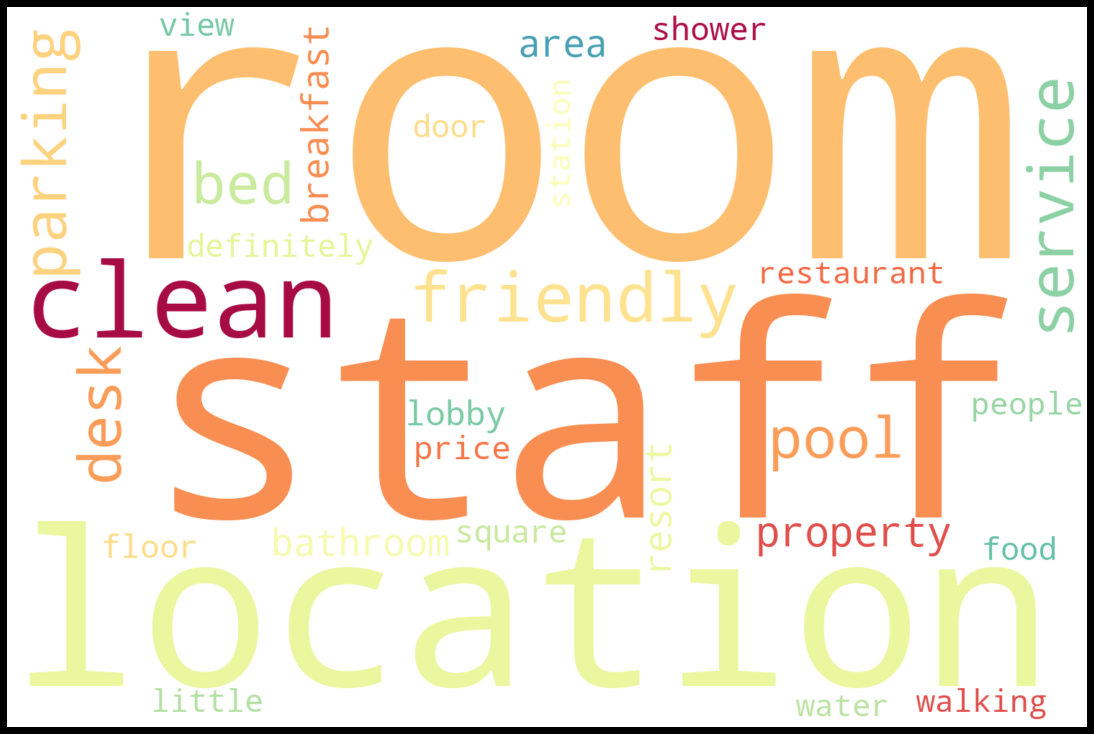

In [44]:
# create the word cloud:
wordcloud = WordCloud(background_color='white', width=1500, height=1000, colormap='Spectral').generate_from_frequencies(dict_word)

# Display the generated image w/ matplotlib:
plt.figure(figsize=(15,15), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## Refering each review with a tag

In [45]:
room_review = []
room = ['room', 'door', 'bed', 'clean','stay']
for i in data['Translated']:
    for k in room:
        if k in i:
            x = 1
            break
        else:
            x = 0
    room_review.append(x)

In [46]:
hotel_review = []
hotel = ['staff', 'area', 'location', 'lobby','resort', 'hotel','property','motel', 'building', 'view', 'beautiful']
for i in data['Translated']:
    for k in hotel:
        if k in i:
            x = 1
            break
        else:
            x = 0
    hotel_review.append(x)

In [47]:
food_review = []
food = ['food', 'restaurant', 'breakfast', 'lobby','coffee', 'smell']
for i in data['Translated']:
    for k in food:
        if k in i:
            x = 1
            break
        else:
            x = 0
    food_review.append(x)

In [48]:
staff_review = []
staff = ['manager', 'rude', 'facilities', 'housekeeping', 'service', 'staff', 'friendly']
for i in data['Translated']:
    for k in staff:
        if k in i:
            x = 1
            break
        else:
            x = 0
    staff_review.append(x)

In [49]:
washroom_review = []
washroom = ['toilet', 'tub', 'towels', 'shower', 'bathroom', 'bathtub']
for i in data['Translated']:
    for k in washroom:
        if k in i:
            x = 1
            break
        else:
            x = 0
    washroom_review.append(x)

In [50]:
price_review = []
price = ['charged', 'fee', 'paid', 'charge', 'dollar', 'pay']
for i in data['Translated']:
    for k in price:
        if k in i:
            x = 1
            break
        else:
            x = 0
    price_review.append(x)

In [51]:
amenities_review = []
amenities = ['pools', 'amenities', 'bar', 'park', 'parking', '$']
for i in data['Translated']:
    for k in amenities:
        if k in i:
            x = 1
            break
        else:
            x = 0
    amenities_review.append(x)

In [52]:
data['room_review'] = room_review
data['hotel_review'] = hotel_review
data['amenities_review'] = amenities_review 
data['price_review'] = price_review
data['washroom_review'] = washroom_review
data['food_review'] = food_review
data['staff_review'] = staff_review

In [53]:
data

,Review,date,Location,Translated,Address,Country,room_review,hotel_review,amenities_review,price_review,washroom_review,food_review,staff_review
0,I was very impressed with the resort Great sta...,2019-08-20,Sebastian,I was very impressed with the resort Great sta...,"Sebastian County, Arkansas, United States",United States,0,1,1,0,0,0,1
1,The rooms were nice the outside needs work als...,2019-08-20,The Angels,The rooms were nice the outside needs work als...,"Angels, Spanish Town, Saint Catherine, Middles...",Jamaica,1,0,0,0,0,1,0
2,Great location I have stayed at this hotel on ...,2019-08-20,Georgia,Great location I have stayed at this hotel on ...,"Georgia, United States",United States,1,1,0,0,0,0,0
3,The hotel was adequate for my stay The strips ...,2019-08-20,NaN,The hotel was adequate for my stay The strips ...,None,None,1,1,0,1,1,0,1
4,Great location room was large and spacious Par...,2019-08-19,Palm Harbor,Great location room was large and spacious Par...,"Palm Harbor, Tarpon Springs, Pinellas County, ...",United States,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,the staff were all so friendly frank the chef ...,2019-07-12,United States of America,the staff were all so friendly frank the chef ...,United States,United States,1,1,1,0,1,1,1
6388,the internet barely worked or didnt work,2019-07-12,United States of America,the internet barely worked or didnt work,United States,United States,0,0,1,0,0,0,0
6389,the location was great the bed was the most un...,2019-07-10,United States of America,the location was great the bed was the most un...,United States,United States,1,1,0,0,0,0,0
6390,we were early for check in and the staff was v...,2019-07-10,United States of America,we were early for check in and the staff was v...,United States,United States,0,1,0,0,0,0,1


## Saving reviews in a file for sentiment analysis

In [82]:
id_test = []
for i in range(6392):
    a = "ID-"+'{:04}'.format(i)
    id_test.append(a)

In [83]:
df = pd.DataFrame()
df['id'] = id_test
df['review'] = data['Translated']
df

,id,review
0,ID-0000,I was very impressed with the resort Great sta...
1,ID-0001,The rooms were nice the outside needs work als...
2,ID-0002,Great location I have stayed at this hotel on ...
3,ID-0003,The hotel was adequate for my stay The strips ...
4,ID-0004,Great location room was large and spacious Par...
...,...,...
6387,ID-6387,the staff were all so friendly frank the chef ...
6388,ID-6388,the internet barely worked or didnt work
6389,ID-6389,the location was great the bed was the most un...
6390,ID-6390,we were early for check in and the staff was v...


In [84]:
df.to_csv('test.txt', sep="\t", header=None,index=False)

In [85]:
df

,id,review
0,ID-0000,I was very impressed with the resort Great sta...
1,ID-0001,The rooms were nice the outside needs work als...
2,ID-0002,Great location I have stayed at this hotel on ...
3,ID-0003,The hotel was adequate for my stay The strips ...
4,ID-0004,Great location room was large and spacious Par...
...,...,...
6387,ID-6387,the staff were all so friendly frank the chef ...
6388,ID-6388,the internet barely worked or didnt work
6389,ID-6389,the location was great the bed was the most un...
6390,ID-6390,we were early for check in and the staff was v...


In [86]:
import os
import json
from csv import DictReader, DictWriter
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import train_test_split

SEED = 5



if __name__ == "__main__":

    # Read in d

    dset_x = []
    dset_y = []
    pos_d =[]
    neg_d =[]
    test_d = []
    test_ids = [] 
    pos_d_Count=0
    neg_d_Count=0
    sentiment = []
    i=0
    with open(r'C:\Users\ATE\Desktop\Project\clootrack\hotelNegT-train.txt',encoding="utf8") as f:
        for d in f.readlines():    
            
            dset_x.append(d.split('\t', 1)[1])
            dset_y.append(-1)
            i+=1
    with open(r'C:\Users\ATE\Desktop\Project\clootrack\hotelPosT-train.txt',encoding="utf8") as f:
        for d in f.readlines():    
            dset_x.append(d.split('\t', 1)[1])
            dset_y.append(1)
            i+=1
    with open(r'C:\Users\ATE\Desktop\Project\clootrack\test.txt',encoding="utf8") as f:
        for d in f.readlines(): 
            test_d.append(d.split('\t',1)[1])
            test_ids.append(d.split('\t',1)[0])
            i+=1
    X_test = test_d
    print("total dset size = ",i)
    print(len(dset_x),len(dset_y))
    X_train, y_train = dset_x, dset_y

    print("Training Classifier")
    vocab = {}
    positive_word_dictionary= {}
    negative_word_dictionary= {}
    
    for i in range(len(X_train)):
        words = re.split('\s+', X_train[i])
        pos = y_train[i] == -1 
        if pos == True:
            neg_d.append(X_train[i])
            neg_d_Count+= len(words)
        else:
            pos_d.append(X_train[i])  
            pos_d_Count+= len(words)

        for string in words:
            vocab[string] = 1
            if pos == True:
                if string in negative_word_dictionary.keys():
                    negative_word_dictionary[string] +=1
                else:
                    negative_word_dictionary[string] = 1
            else:
                if string in positive_word_dictionary.keys():
                    positive_word_dictionary[string] +=1
                else:
                    positive_word_dictionary[string] = 1
    V = len(vocab)
    print("vocab length = ",V)
    print("neg_d_Count",neg_d_Count)
    print("pos_d_Count",pos_d_Count)
    Nd= len(X_train)
    Ncpos = len(pos_d)
    Ncneg = len(neg_d)
    logpriorpos = math.log(Ncpos/Nd)
    logpriorneg = math.log(Ncneg/Nd)
    log_likelihoodpos= {}
    log_likelihoodneg = {}
    for w in vocab.keys():
        pw,nw =1,1
        if w in positive_word_dictionary.keys(): 
            pw += positive_word_dictionary[w]
        log_likelihoodpos[w] = math.log(pw/(pos_d_Count + V))
        if w in negative_word_dictionary.keys():
            nw += negative_word_dictionary[w]
        nw = nw/(neg_d_Count + V)
        log_likelihoodneg[w] = math.log(nw)

    print("Training Classifier")
    y_pred = []
    output = open("output1.txt",'w')
    for j in range(len(X_test)):
        test = X_test[j]
        max_pos = logpriorpos
        max_neg = logpriorneg
        words = re.split('\s+',test)
        for w in words:
            if w in vocab:
                max_pos += log_likelihoodpos[w]
                max_neg += log_likelihoodneg[w]
        print(max_neg,max_pos)
        if max_pos > max_neg:
            y_pred.append(1)
        else:
            y_pred.append(-1)
        if y_pred[j] == 1:
            print(test_ids[j],"POS")
            sentiment.append("POSITIVE")
            output.write(test_ids[j]+"\t"+"POS\n")
        else :
            print(test_ids[j],"NEG")
            sentiment.append("NEGATIVE")
            output.write(test_ids[j]+"\t"+"NEG\n")

total dset size =  6581
189 189
Training Classifier
vocab length =  4434
neg_d_Count 11263
pos_d_Count 11365
Training Classifier
-189.21653836445867 -177.25528181947095
ID-0000 POS
-142.11748345420267 -142.25639445348236
ID-0001 NEG
-110.67611408385389 -110.13763424148608
ID-0002 POS
-432.77340129180334 -439.8875145091534
ID-0003 NEG
-113.92077505385429 -104.52442498215436
ID-0004 POS
-138.42843247610068 -138.16364216835228
ID-0005 POS
-19.78114248129725 -19.43626825528575
ID-0006 POS
-108.23693466584115 -104.91157436947763
ID-0007 POS
-161.41810585499374 -160.50506930579098
ID-0008 POS
-179.64677483769194 -178.79212115154508
ID-0009 POS
-220.03521880004072 -208.2464285868637
ID-0010 POS
-62.27565057759932 -57.65186518856265
ID-0011 POS
-93.88456868261238 -88.52566611011163
ID-0012 POS
-35.62023547123416 -33.11457311590933
ID-0013 POS
-172.36951313318713 -170.67843296031407
ID-0014 POS
-88.83546150763134 -85.4427041530779
ID-0015 POS
-60.779187468927134 -57.82075337991443
ID-0016 POS
-

ID-0389 NEG
-143.57245527210037 -149.72452107937838
ID-0390 NEG
-221.82894805146097 -229.15120721903892
ID-0391 NEG
-99.92768004450564 -102.90715456352284
ID-0392 NEG
-583.3700492618843 -589.6351721876214
ID-0393 NEG
-70.71923631662895 -70.33537589570706
ID-0394 POS
-524.9370985464686 -514.88368813204
ID-0395 POS
-82.4314842001233 -78.04397464277507
ID-0396 POS
-182.35017354842407 -178.70181234509633
ID-0397 POS
-146.32011303569698 -135.640827658415
ID-0398 POS
-147.9341515183967 -148.38816650962568
ID-0399 NEG
-131.0491548585526 -123.79602457739595
ID-0400 POS
-182.0299887109585 -186.30130608391545
ID-0401 NEG
-289.85839843071597 -292.6460348070461
ID-0402 NEG
-114.16174452957341 -113.35615459005874
ID-0403 POS
-86.90603138359864 -87.05633649634326
ID-0404 NEG
-1336.5711012190218 -1339.4221466122992
ID-0405 NEG
-190.45332905006006 -197.92071955050523
ID-0406 NEG
-173.58039640215074 -176.47444317439962
ID-0407 NEG
-62.68400878561021 -65.60477032451443
ID-0408 NEG
-318.56748381192 -338.

ID-0764 POS
-130.3705693491323 -124.30513545992636
ID-0765 POS
-85.67221362506564 -87.00448458158064
ID-0766 NEG
-373.72440736957043 -375.8826160937355
ID-0767 NEG
-70.13622560475609 -67.26554617319677
ID-0768 POS
-85.72667150455882 -84.37340332219279
ID-0769 POS
-76.60062186687024 -72.07076217656294
ID-0770 POS
-84.86314030031636 -86.6414044026675
ID-0771 NEG
-58.27506311611914 -54.79295327486923
ID-0772 POS
-79.83568515598874 -75.48060002975241
ID-0773 POS
-190.96632479341753 -182.9211385827923
ID-0774 POS
-464.97900732479815 -472.60123641121186
ID-0775 NEG
-255.80916299045919 -253.95296536251627
ID-0776 POS
-96.50247046347548 -96.93714540860658
ID-0777 NEG
-132.08948640811312 -132.26916807607017
ID-0778 NEG
-53.520066738536954 -53.275783988291025
ID-0779 POS
-112.85953455186282 -107.98587423005533
ID-0780 POS
-118.52373101718133 -110.48823239612396
ID-0781 POS
-21.950196181666772 -21.660891806810085
ID-0782 POS
-823.6894681838934 -819.8276733325114
ID-0783 POS
-284.2636362535529 -27

-266.4906147412264 -268.794795300842
ID-1139 NEG
-401.76818216865945 -402.97331624223034
ID-1140 NEG
-129.41088103474394 -127.17746856578121
ID-1141 POS
-10.748526250444417 -10.591391333281381
ID-1142 POS
-72.27145667576706 -66.17571532796384
ID-1143 POS
-83.56581457139347 -74.21581596085439
ID-1144 POS
-59.885490845689944 -62.34359030935831
ID-1145 NEG
-158.52145381485664 -155.4161996892363
ID-1146 POS
-87.78781168667919 -91.99069838170047
ID-1147 NEG
-205.1333990834657 -207.0959874707966
ID-1148 NEG
-88.75972543723559 -84.71697975551231
ID-1149 POS
-134.53205831879083 -133.98920436029132
ID-1150 POS
-191.48469949672608 -195.4317858352577
ID-1151 NEG
-170.54633438544423 -174.84488713435996
ID-1152 NEG
-123.73135944832323 -121.52644796929128
ID-1153 POS
-1032.657334600429 -1065.1777598722151
ID-1154 NEG
-111.5853302920948 -105.04875380188953
ID-1155 POS
-38.33138393437447 -36.77968417302969
ID-1156 POS
-157.2268022457623 -146.87569569423673
ID-1157 POS
-35.55644096756243 -36.9664896174

-36.4554661571392 -33.68518205275147
ID-1514 POS
-47.05154290197655 -43.195484950259576
ID-1515 POS
-201.55854980554136 -206.63754547039815
ID-1516 NEG
-114.93602500697547 -110.2619643041762
ID-1517 POS
-133.26983522388528 -131.74531702898565
ID-1518 POS
-157.26476922641956 -150.1497332282502
ID-1519 POS
-69.83508820577019 -65.13452212342139
ID-1520 POS
-182.94994073935302 -179.1875823518792
ID-1521 POS
-128.6111512953476 -132.23311460021839
ID-1522 NEG
-205.56822651298862 -194.56363919948515
ID-1523 POS
-81.84197927211335 -80.99814486225216
ID-1524 POS
-242.8585482572671 -233.32027113014055
ID-1525 POS
-23.090900090433067 -22.32971540724712
ID-1526 POS
-133.0189151753049 -133.448357928836
ID-1527 NEG
-273.4918803951133 -266.835087569902
ID-1528 POS
-45.44210498954245 -42.65648844952689
ID-1529 POS
-285.09374647135 -278.15136577519337
ID-1530 POS
-41.84807381559081 -40.02832244289473
ID-1531 POS
-520.5785102659313 -518.4277300008097
ID-1532 POS
-320.1718972847622 -313.7929975127596
ID-

-459.5151694333731 -467.31731539179185
ID-1889 NEG
-231.58784983466924 -236.6598052625306
ID-1890 NEG
-46.69363494349925 -45.80862154390385
ID-1891 POS
-545.8533907003314 -545.8474997444513
ID-1892 POS
-25.393485183427114 -22.868711907979808
ID-1893 POS
-53.35179966380783 -56.3915785787067
ID-1894 NEG
-74.2128930091858 -78.20433407299113
ID-1895 NEG
-224.5644164505722 -224.49971742290876
ID-1896 POS
-279.1408549525853 -278.77606995383746
ID-1897 POS
-158.68454473124729 -151.2536448917351
ID-1898 POS
-63.63115016380818 -61.249587621437975
ID-1899 POS
-110.65335809263124 -107.43694924809544
ID-1900 POS
-82.45018677168319 -83.014273312262
ID-1901 NEG
-306.5065724076164 -313.4065562168218
ID-1902 NEG
-5.805800231464305 -5.791223857864114
ID-1903 POS
-57.962781703497335 -55.59471552357551
ID-1904 POS
-216.4221790430751 -215.1526220161556
ID-1905 POS
-108.21276035358532 -111.08204967885885
ID-1906 NEG
-80.8033782206177 -81.15256134636043
ID-1907 NEG
-5.805800231464305 -5.791223857864114
ID-1

-262.7141261583453 -261.2989388977614
ID-2264 POS
-107.02628930216336 -106.79835454114041
ID-2265 POS
-61.734757187314926 -58.69456668352148
ID-2266 POS
-112.71092599150353 -109.10175304004271
ID-2267 POS
-165.35367387322881 -170.50598317814126
ID-2268 NEG
-68.5892304775616 -67.95651923487459
ID-2269 POS
-78.23369639936274 -71.29747316152455
ID-2270 POS
-148.34114794837822 -141.94085567392028
ID-2271 POS
-144.2255497565881 -142.7579565589707
ID-2272 POS
-153.78762380363722 -153.31666040387884
ID-2273 POS
-437.3246766729878 -443.843614564929
ID-2274 NEG
-47.31122594828324 -47.35299405475401
ID-2275 NEG
-677.9415044465162 -703.4807853071554
ID-2276 NEG
-151.3903389406397 -156.6789096446714
ID-2277 NEG
-68.79884992167206 -65.35129169148914
ID-2278 POS
-256.96969842697496 -260.51670994477865
ID-2279 NEG
-80.61886008142521 -79.35469826218142
ID-2280 POS
-66.49209179917925 -62.243501912151906
ID-2281 POS
-1127.5596063585788 -1091.740069371698
ID-2282 POS
-232.20181011551728 -238.402205291305

-341.9778679723748 -332.572556629701
ID-2658 POS
-125.21436219681486 -126.22366744038918
ID-2659 NEG
-143.89388766688023 -145.7611751871891
ID-2660 NEG
-72.32354764624586 -69.21769503515605
ID-2661 POS
-77.28573215997069 -72.31342445674805
ID-2662 POS
-95.09020873280248 -88.53852689040211
ID-2663 POS
-323.5900771350812 -327.0870232003469
ID-2664 NEG
-625.9715988473482 -606.1813947784595
ID-2665 POS
-72.3967189036333 -70.07474397557311
ID-2666 POS
-474.1111034378369 -449.4857973264514
ID-2667 POS
-42.55456136843954 -36.89002802940924
ID-2668 POS
-626.5252646979895 -619.1738258626018
ID-2669 POS
-295.52521998409975 -283.0366057001771
ID-2670 POS
-43.9399378772692 -40.006613237327976
ID-2671 POS
-68.15852720464414 -67.59095100301309
ID-2672 POS
-246.2046686900229 -241.15462116560607
ID-2673 POS
-40.05631434636276 -39.39971378347236
ID-2674 POS
-421.09763635399946 -405.54938652228765
ID-2675 POS
-108.5222650206383 -108.54373535010886
ID-2676 NEG
-110.55171982231832 -113.28632994377402
ID-2

ID-3019 POS
-41.70040006312736 -37.68200033188094
ID-3020 POS
-137.6997282467553 -141.65891968512832
ID-3021 NEG
-1042.5001274674569 -1067.4955899849106
ID-3022 NEG
-476.7108638421524 -484.85064938083525
ID-3023 NEG
-105.98722636612953 -100.07483808061723
ID-3024 POS
-18.105381925932075 -16.91324597257524
ID-3025 POS
-136.17063921522114 -143.63289378056638
ID-3026 NEG
-93.29289726511206 -93.6337179134997
ID-3027 NEG
-484.3520919333394 -490.7590853939796
ID-3028 NEG
-864.5397871693997 -898.2387705206041
ID-3029 NEG
-115.17786058399346 -117.05860505644158
ID-3030 NEG
-154.43096789179185 -148.4242792574091
ID-3031 POS
-77.63113073168773 -73.9435371605454
ID-3032 POS
-382.0548518845039 -354.8855466184742
ID-3033 POS
-313.0214944848428 -330.9537257932919
ID-3034 NEG
-132.7110153884239 -128.8555156994911
ID-3035 POS
-412.51550691285945 -396.4352790007344
ID-3036 POS
-60.66642998026396 -54.66475550381147
ID-3037 POS
-97.58304492036845 -89.96298287003216
ID-3038 POS
-65.51394977600756 -71.0264

-90.52719960199961 -81.83978266016501
ID-3406 POS
-153.79487132661194 -153.02834212471652
ID-3407 POS
-581.5029322666848 -590.7295802361094
ID-3408 NEG
-359.5300641057965 -359.8253128678075
ID-3409 NEG
-86.72203468642675 -80.70174081819651
ID-3410 POS
-66.67051453697893 -60.381065341433455
ID-3411 POS
-192.7127164519309 -191.67195778275672
ID-3412 POS
-371.6853604610793 -370.9466440646232
ID-3413 POS
-60.734825832429706 -56.07438197900592
ID-3414 POS
-103.18505745143081 -92.87753856229283
ID-3415 POS
-1312.012155154757 -1304.7584454014132
ID-3416 POS
-563.7965132585663 -558.4974954918823
ID-3417 POS
-246.95682869256197 -241.1157558472339
ID-3418 POS
-155.8477674386924 -153.0276056857664
ID-3419 POS
-43.299533616864075 -40.533693235212
ID-3420 POS
-268.3809021580646 -272.0025698291544
ID-3421 NEG
-77.22205109738401 -72.52752927770503
ID-3422 POS
-171.07950576683575 -169.1623273299925
ID-3423 POS
-150.53787913310148 -149.46312164452988
ID-3424 POS
-189.61010684309556 -183.16026792434545


-654.5727151648955 -672.7673924246019
ID-3781 NEG
-84.4809360943657 -85.57800624116285
ID-3782 NEG
-104.66071593835429 -99.56417937147539
ID-3783 POS
-80.16204236284392 -73.53172964549411
ID-3784 POS
-88.34629810413475 -88.61393213923928
ID-3785 NEG
-15.46702512173951 -14.360313495068851
ID-3786 POS
-238.73556632078422 -254.66707933902856
ID-3787 NEG
-139.2908542840537 -135.48721645897058
ID-3788 POS
-325.05849643937626 -312.47466796677844
ID-3789 POS
-120.18062246757816 -115.21735346431133
ID-3790 POS
-232.37586021451153 -228.46492269831344
ID-3791 POS
-291.938973123117 -293.5757579133324
ID-3792 NEG
-92.47272266335546 -93.79700164499268
ID-3793 NEG
-610.7309004153409 -624.0723347553359
ID-3794 NEG
-161.69964244285381 -158.12063622596153
ID-3795 POS
-103.31581343252547 -98.3531745242634
ID-3796 POS
-300.7912091644556 -298.0357632135579
ID-3797 POS
-72.09572888511016 -73.4638406654512
ID-3798 NEG
-176.17679631726557 -170.67440759283622
ID-3799 POS
-848.1601934617921 -860.2830074840728


ID-4144 POS
-462.59784274864637 -471.4198685581754
ID-4145 NEG
-1394.3108618423605 -1422.4298765020203
ID-4146 NEG
-142.84847364380042 -136.37934225650451
ID-4147 POS
-291.0126547085199 -284.7063112481803
ID-4148 POS
-245.15992384029514 -242.16987091909218
ID-4149 POS
-60.23478341373287 -61.10823380374129
ID-4150 NEG
-126.94019925837887 -118.87706236447232
ID-4151 POS
-62.247606836060186 -64.18733828018888
ID-4152 NEG
-81.3558602589387 -79.9179219435975
ID-4153 POS
-263.95472874526257 -255.56385988716139
ID-4154 POS
-236.0722331198304 -216.4903205898958
ID-4155 POS
-203.17425373496593 -210.2531488306937
ID-4156 NEG
-645.2841063965674 -644.8370849062788
ID-4157 POS
-366.06327229990114 -375.79457057160243
ID-4158 NEG
-473.240297671594 -450.56391925595796
ID-4159 POS
-184.8648962861555 -178.69327968937571
ID-4160 POS
-125.7499512451835 -122.21836188281559
ID-4161 POS
-348.09609207929424 -339.797769888959
ID-4162 POS
-402.3163453266615 -399.25697910776415
ID-4163 POS
-58.85547822949123 -55

-20.340758269232673 -19.64598878626782
ID-4513 POS
-66.50214185579836 -62.48504923549304
ID-4514 POS
-17.649515186446845 -17.379030870916925
ID-4515 POS
-35.41896614546309 -32.37845912989861
ID-4516 POS
-159.61049599546664 -157.45717127471235
ID-4517 POS
-206.44241083443967 -200.82807162279502
ID-4518 POS
-1128.5870910593671 -1099.4411541443965
ID-4519 POS
-235.31301653808293 -229.72031166481256
ID-4520 POS
-123.70230523735653 -115.24493746873759
ID-4521 POS
-95.899944825046 -92.92193929889889
ID-4522 POS
-180.72134273573917 -180.13754763625172
ID-4523 POS
-156.06379756256527 -153.41741178202741
ID-4524 POS
-157.35213103227514 -146.26621730768323
ID-4525 POS
-107.74671814172116 -112.33360479239758
ID-4526 NEG
-426.5430652171483 -440.2811809699545
ID-4527 NEG
-170.50894308515726 -180.8232749012878
ID-4528 NEG
-78.79934089683813 -77.62553214903461
ID-4529 POS
-65.17458189726266 -64.05025717905038
ID-4530 POS
-99.3985031683241 -99.51379912795399
ID-4531 NEG
-122.51616772059621 -120.749517

-236.9539257918234 -248.2959307346464
ID-4888 NEG
-1276.3635406004423 -1338.3501308739153
ID-4889 NEG
-216.48941971064215 -227.296859526099
ID-4890 NEG
-130.46436334599895 -130.98892209781312
ID-4891 NEG
-22.665632355028723 -23.1291982376231
ID-4892 NEG
-415.769237350696 -414.0172212382489
ID-4893 POS
-25.53034436614431 -23.023975141231674
ID-4894 POS
-87.50255689499373 -89.87124350572218
ID-4895 NEG
-100.05288022536398 -92.36596133692385
ID-4896 POS
-91.518113606822 -87.48720604720772
ID-4897 POS
-20.340758269232673 -19.9336708587196
ID-4898 POS
-66.85307421736016 -63.74660478318014
ID-4899 POS
-120.78390596671292 -125.27896716504414
ID-4900 NEG
-73.22842878679363 -71.76926363818835
ID-4901 POS
-109.08812084402716 -105.40316750217711
ID-4902 POS
-33.38168924607827 -31.215823556916202
ID-4903 POS
-92.79630914406788 -91.11871309151343
ID-4904 POS
-28.54445173317917 -27.43526453221557
ID-4905 POS
-224.90800507227146 -219.34417174098635
ID-4906 POS
-30.53434482463938 -30.711684589769863
I

-740.2820788405601 -729.5185071404709
ID-5263 POS
-177.37922596728126 -176.1503130326469
ID-5264 POS
-145.9931920537252 -149.5272625274998
ID-5265 NEG
-110.35021192490524 -115.81502595944302
ID-5266 NEG
-727.0924770065587 -746.7386493252305
ID-5267 NEG
-321.9869071950699 -325.88154398604155
ID-5268 NEG
-147.92944786500343 -147.56338888073836
ID-5269 POS
-95.47712031986143 -90.55338004240252
ID-5270 POS
-117.44057544055255 -117.37758365618458
ID-5271 POS
-168.23100682043605 -158.38068314847197
ID-5272 POS
-269.3470464339185 -279.57998504134173
ID-5273 NEG
-465.5736076242775 -465.19170291080314
ID-5274 POS
-77.10184764895021 -76.4525751738076
ID-5275 POS
-111.94773332253023 -103.71165015808539
ID-5276 POS
-935.9872733909662 -966.3342365536037
ID-5277 NEG
-228.9369903627248 -230.88645938926368
ID-5278 NEG
-66.13952916978133 -64.53456813847649
ID-5279 POS
-336.47612776327935 -342.7895282731204
ID-5280 NEG
-593.1543864465696 -583.550490939193
ID-5281 POS
-106.28224767313847 -102.45635610717

-299.13407005734507 -298.6142199994566
ID-5621 POS
-323.6065430883669 -298.7950153793645
ID-5622 POS
-265.6596293344582 -256.2575230489233
ID-5623 POS
-237.48677078438322 -226.37093897283114
ID-5624 POS
-244.11961831652647 -251.63099432785418
ID-5625 NEG
-298.71280978922874 -294.19929938368625
ID-5626 POS
-217.31809408634962 -213.27469010963424
ID-5627 POS
-262.3916389927051 -261.7795438472061
ID-5628 POS
-280.7629732516649 -273.8078933228406
ID-5629 POS
-278.76590571737563 -283.1507765679284
ID-5630 NEG
-279.44516982027744 -283.65699106877906
ID-5631 NEG
-305.7566448801603 -309.57558083782016
ID-5632 NEG
-266.2014474703903 -257.3941250194664
ID-5633 POS
-253.83509656208145 -252.65663338096465
ID-5634 POS
-277.0706717193681 -270.5141440529525
ID-5635 POS
-190.59933637684324 -182.09803783624835
ID-5636 POS
-232.58653267669104 -227.54879629004063
ID-5637 POS
-210.26704924895444 -199.70405350106054
ID-5638 POS
-196.39802859795623 -193.37152752271038
ID-5639 POS
-284.4507225234235 -278.969

-294.7667634172805 -284.11664189899244
ID-5889 POS
-238.91536620084565 -229.7459585327278
ID-5890 POS
-294.3217470544549 -295.0857632220254
ID-5891 NEG
-260.15463415423005 -255.66417537516332
ID-5892 POS
-277.79023315803107 -261.601361885382
ID-5893 POS
-307.51934050023567 -284.74517237884714
ID-5894 POS
-284.79100484448634 -273.6257241832652
ID-5895 POS
-254.16073661168346 -246.5232950427824
ID-5896 POS
-249.91176374253854 -240.0349311409139
ID-5897 POS
-259.78563903646176 -252.42689103159262
ID-5898 POS
-289.40459754835194 -289.3358746323016
ID-5899 POS
-262.52459604934705 -247.08340976513907
ID-5900 POS
-195.68784796977886 -193.23464060533178
ID-5901 POS
-263.0699173392867 -264.5730774675795
ID-5902 NEG
-303.57150357944727 -303.90483861916294
ID-5903 NEG
-294.87434615516884 -297.61035604510676
ID-5904 NEG
-262.68023766525897 -249.38243327010778
ID-5905 POS
-222.24514074745846 -221.77917630394094
ID-5906 POS
-318.88380673766767 -312.44378771480933
ID-5907 POS
-278.57042860204984 -266

ID-6262 NEG
-234.87078424959404 -231.83566311127862
ID-6263 POS
-120.39151168762987 -112.22464004018266
ID-6264 POS
-70.2019394545377 -68.80117588770247
ID-6265 POS
-61.60125044697451 -63.68229960663834
ID-6266 NEG
-13.85758720930541 -13.379484242057128
ID-6267 POS
-224.2153941374611 -215.8030965900485
ID-6268 POS
-184.23363630958025 -181.63710036809508
ID-6269 POS
-68.50003528921988 -68.16219076968365
ID-6270 POS
-836.1701724394975 -846.9351972408771
ID-6271 NEG
-388.54095695163625 -375.06888341860747
ID-6272 POS
-385.6604913796929 -395.17951894822687
ID-6273 NEG
-25.46402172321324 -24.09604124866009
ID-6274 POS
-155.07957592479187 -158.20101164294968
ID-6275 NEG
-33.47658798790106 -31.91407278936004
ID-6276 POS
-53.284545584233186 -44.14486465002574
ID-6277 POS
-21.727052630352564 -22.354038987370032
ID-6278 NEG
-164.2798472928788 -167.42909077352311
ID-6279 NEG
-41.897883867660994 -44.064127085215794
ID-6280 NEG
-58.75882019168364 -61.15577846912774
ID-6281 NEG
-59.49291917261439 -6

In [87]:
sentiment

['POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',

In [88]:
data['Sentiment'] = sentiment

In [89]:
data

,Review,date,Location,Translated,Address,Country,room_review,hotel_review,amenities_review,price_review,washroom_review,food_review,staff_review,Sentiment
0,I was very impressed with the resort Great sta...,2019-08-20,Sebastian,I was very impressed with the resort Great sta...,"Sebastian County, Arkansas, United States",United States,0,1,1,0,0,0,1,POSITIVE
1,The rooms were nice the outside needs work als...,2019-08-20,The Angels,The rooms were nice the outside needs work als...,"Angels, Spanish Town, Saint Catherine, Middles...",Jamaica,1,0,0,0,0,1,0,NEGATIVE
2,Great location I have stayed at this hotel on ...,2019-08-20,Georgia,Great location I have stayed at this hotel on ...,"Georgia, United States",United States,1,1,0,0,0,0,0,POSITIVE
3,The hotel was adequate for my stay The strips ...,2019-08-20,NaN,The hotel was adequate for my stay The strips ...,None,None,1,1,0,1,1,0,1,NEGATIVE
4,Great location room was large and spacious Par...,2019-08-19,Palm Harbor,Great location room was large and spacious Par...,"Palm Harbor, Tarpon Springs, Pinellas County, ...",United States,1,1,0,0,0,0,1,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,the staff were all so friendly frank the chef ...,2019-07-12,United States of America,the staff were all so friendly frank the chef ...,United States,United States,1,1,1,0,1,1,1,NEGATIVE
6388,the internet barely worked or didnt work,2019-07-12,United States of America,the internet barely worked or didnt work,United States,United States,0,0,1,0,0,0,0,NEGATIVE
6389,the location was great the bed was the most un...,2019-07-10,United States of America,the location was great the bed was the most un...,United States,United States,1,1,0,0,0,0,0,POSITIVE
6390,we were early for check in and the staff was v...,2019-07-10,United States of America,we were early for check in and the staff was v...,United States,United States,0,1,0,0,0,0,1,POSITIVE


In [97]:
data.to_csv('output_data.csv', sep=',')